In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
titanic_data=pd.read_csv("C:/Users/gupta/OneDrive/Desktop/Datasets/Titanic-Dataset.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
titanic_data.dropna(axis=0, inplace=True)

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
titanic_data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

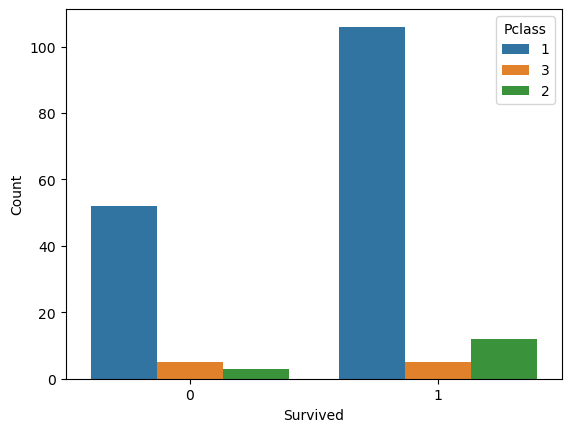

In [12]:
titanic_data['Pclass'] = titanic_data['Pclass'].astype(str)

# Plot the countplot
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [13]:
titanic_data["Sex"]

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object

In [14]:
labelencoder = LabelEncoder()
titanic_data['Sex']=labelencoder.fit_transform(titanic_data['Sex'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [15]:
print(titanic_data['Sex'].unique())


[0 1]


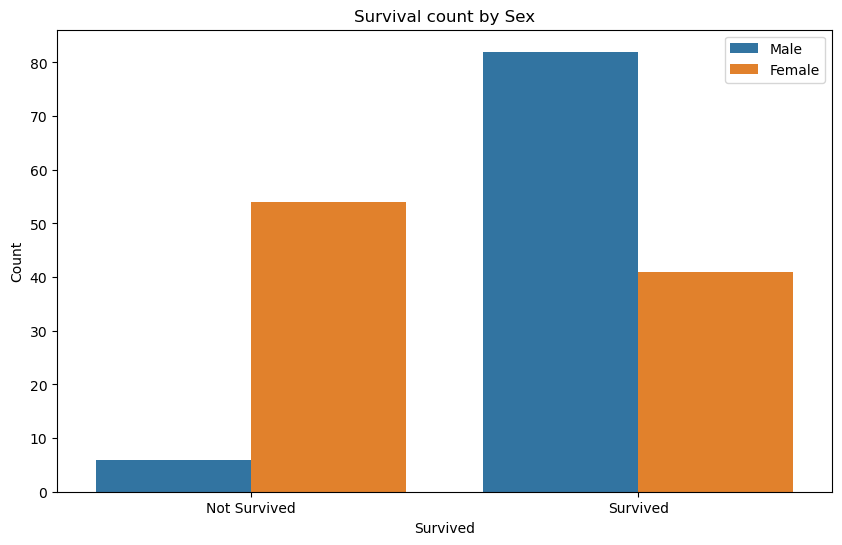

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(['Male', 'Female'])
plt.show()

In [22]:
embarked_encoded = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data = pd.concat([titanic_data, embarked_encoded], axis=1)
titanic_data.drop('Embarked', axis=1, inplace=True)

In [24]:
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_data['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)


In [33]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [35]:
print(y_test)

118    0
251    0
742    1
544    0
712    1
96     0
139    0
337    1
577    1
492    0
487    0
765    1
339    0
835    1
262    0
97     1
291    1
209    1
429    1
307    1
779    1
609    1
707    1
183    1
54     0
618    1
318    1
110    0
717    1
556    1
369    1
305    1
583    0
710    1
332    0
177    0
853    1
Name: Survived, dtype: int64


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7027027027027027


In [42]:
import warnings
warnings.filterwarnings("ignore")
features_for_prediction = [[2, 0, 25, 1, 0, 7.25, 0, 0, 1]]
res = model.predict(features_for_prediction)
if res[0] == 0:
    print("Didn't Survived")
else:
    print("Survived")

Survived


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 7  7]
 [ 4 19]]


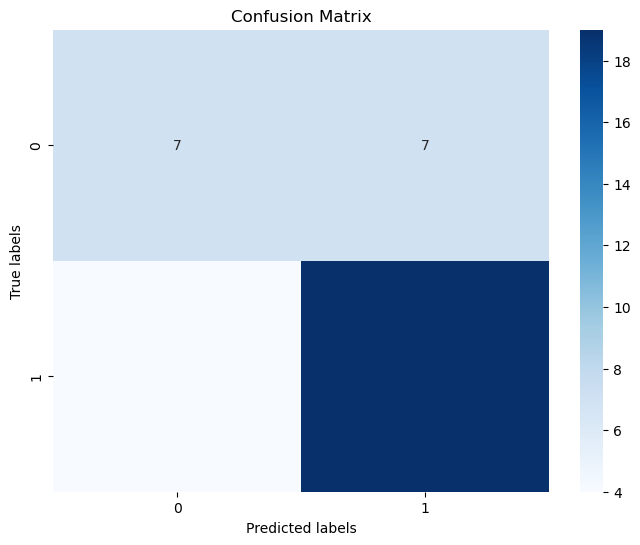

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()